In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def histograma(imagen):
    imagen = cv2.imread(imagen)
    canal_rojo = imagen[:, :, 2]
    canal_verde = imagen[:, :, 1]
    canal_azul = imagen[:, :, 0]
    num_bins = 256 
    hist_rojo = np.zeros(num_bins)
    hist_verde = np.zeros(num_bins)
    hist_azul = np.zeros(num_bins)

    for i in range(imagen.shape[0]):
        for j in range(imagen.shape[1]):
            valor_pixel = canal_rojo[i, j]
            hist_rojo[valor_pixel] += 1
            valor_pixel = canal_verde[i, j]
            hist_verde[valor_pixel] += 1
            valor_pixel = canal_azul[i, j]
            hist_azul[valor_pixel] += 1
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    ax1, ax2 = axs.flatten()
    ax1.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    ax1.set_title('Imagen Original')
    
    ax2.set_title('Histograma de Colores')
    ax2.set_xlabel('Valor de píxel')
    ax2.set_ylabel('Frecuencia')
    ax2.plot(hist_rojo, color='red', label='Canal Rojo')
    ax2.plot(hist_verde, color='green', label='Canal Verde')
    ax2.plot(hist_azul, color='blue', label='Canal Azul')
    ax2.legend()
    plt.show()

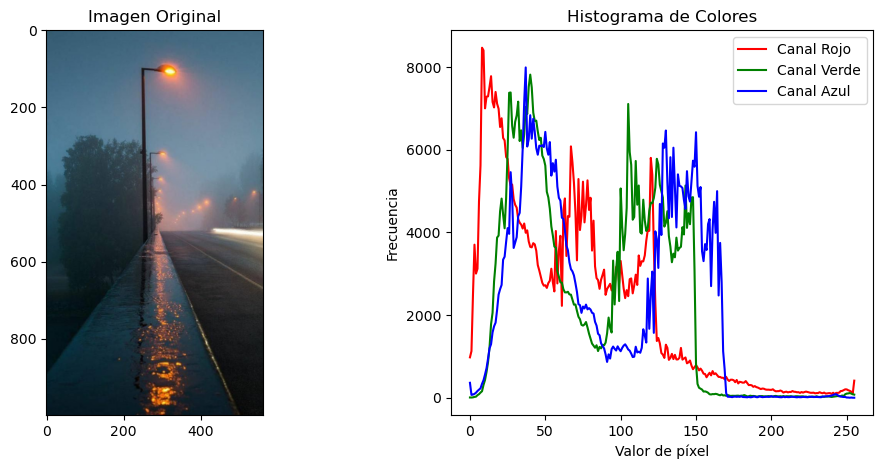

In [37]:
histograma('rain.jpeg')

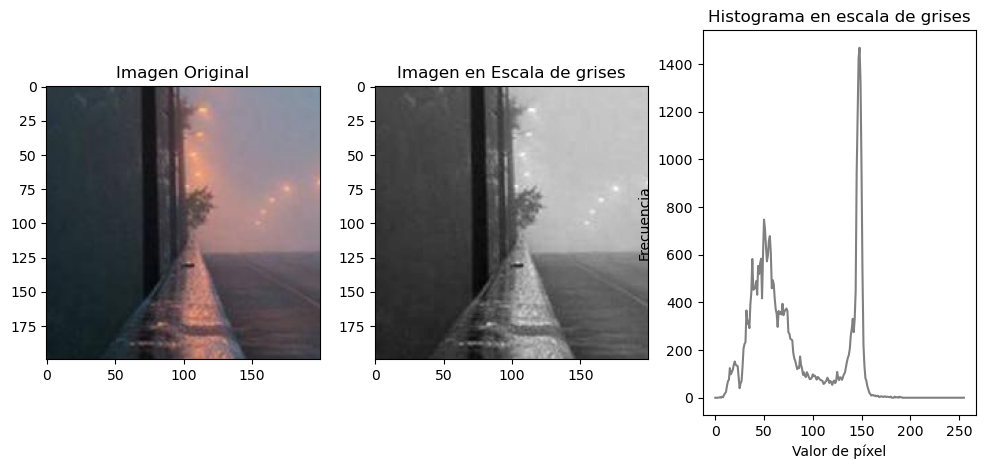

In [38]:
def gray(imagen):
    imagen_gris = np.zeros((imagen.shape[0], imagen.shape[1]), dtype=np.uint8)
    for i in range(imagen.shape[0]):
        for j in range(imagen.shape[1]):            
            r, g, b = imagen[i, j]
            gris = int(0.299 * r + 0.587 * g + 0.114 * b)
            imagen_gris[i, j] = gris
    return imagen_gris

def grayHist(imagen_gris):
    valores_gris = np.zeros(256)
    for i in range(imagen_gris.shape[0]):
        for j in range(imagen_gris.shape[1]):  
            valores_gris[imagen_gris[i, j]] += 1
    return valores_gris

imagen = cv2.imread('rain.jpeg') 
alto, ancho = imagen.shape[:2]
centro_x, centro_y = ancho // 2, alto // 2
tamanio_recorte = 200
x1 = centro_x - (tamanio_recorte // 2)
x2 = centro_x + (tamanio_recorte // 2)
y1 = centro_y - (tamanio_recorte // 2)
y2 = centro_y + (tamanio_recorte // 2)

imagenRecortada = imagen[y1:y2, x1:x2]
imagenRecortada =   imagen[y1:y2, x1:x2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))
ax1, ax2, ax3 = axs.flatten()
ax1.imshow(cv2.cvtColor(imagenRecortada, cv2.COLOR_BGR2RGB))
ax1.set_title('Imagen Original')

imagen_gris = gray(imagenRecortada) 

ax2.set_title('Imagen en Escala de grises')
ax2.imshow(imagen_gris, cmap='gray')

ax3.set_title('Histograma en escala de grises')
ax3.set_xlabel('Valor de píxel')
ax3.set_ylabel('Frecuencia')
ax3.plot(grayHist(imagen_gris), color='gray')

plt.show()      

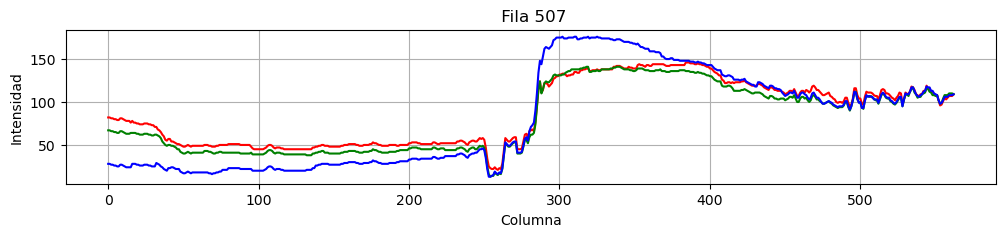

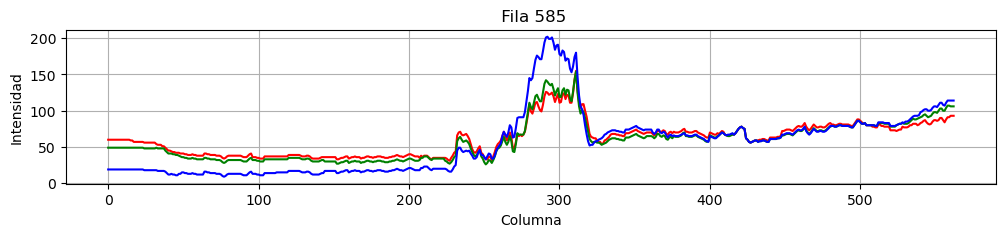

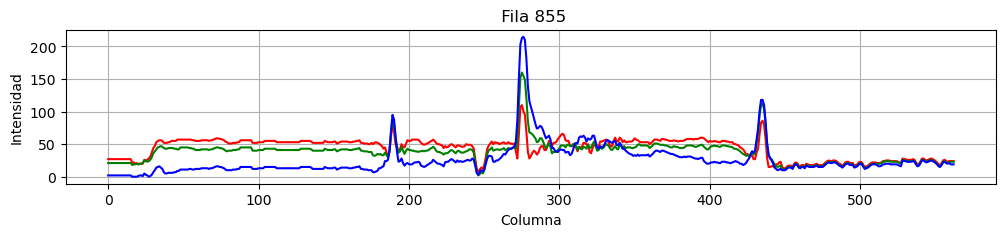

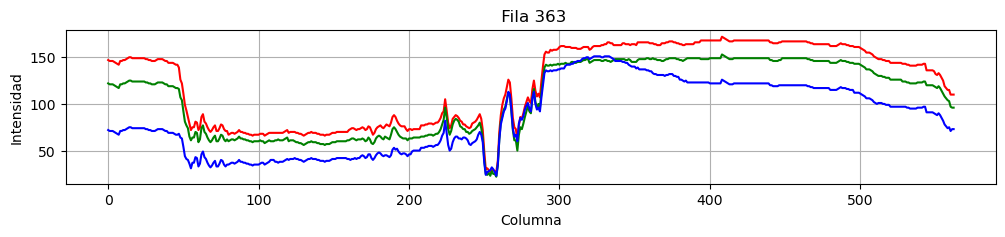

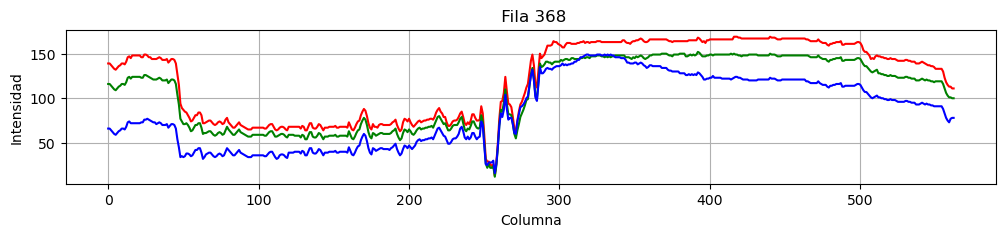

In [35]:
import random
num_filas, num_columnas, _ = imagen.shape

filaRands = []
for _ in range(5):
    filaRand = random.randint(0, num_filas - 1)
    filaRands.append(filaRand)

for fila in filaRands:
    plt.figure(figsize=(12, 2))
    for canal, color in enumerate(['Red', 'Green', 'Blue']):
        intensidad = imagen[fila, :, canal]
        plt.plot(intensidad, color=f'{color}')

    plt.xlabel('Columna')
    plt.ylabel('Intensidad')
    plt.title(f' Fila {fila}')
    
    plt.grid()
    plt.show()

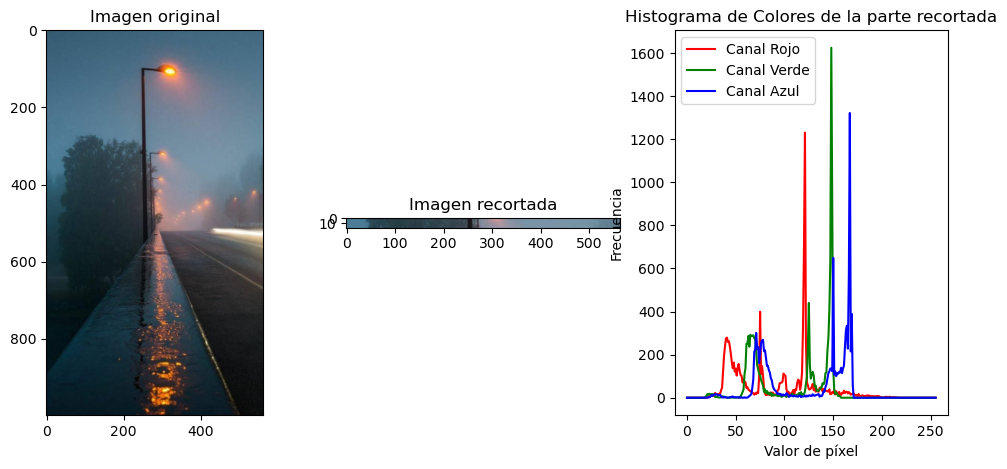

In [39]:
def histograma(imagen):
    
    imagen = cv2.imread(imagen)

    inicio =  random.randint(200,imagen.shape[1]-20)
    fin = inicio + 20

    canal_rojo = imagen[:, :, 2]
    canal_verde = imagen[:, :, 1]
    canal_azul = imagen[:, :, 0]
    num_bins = 256 
    hist_rojo = np.zeros(num_bins)
    hist_verde = np.zeros(num_bins)
    hist_azul = np.zeros(num_bins)

    imagenpor = imagen[inicio:fin, :]

    for i in range(inicio, fin):
        for j in range(imagen.shape[1]):
                valor_pixel = canal_rojo[i, j]
                hist_rojo[valor_pixel] += 1
                valor_pixel = canal_verde[i, j]
                hist_verde[valor_pixel] += 1
                valor_pixel = canal_azul[i, j]
                hist_azul[valor_pixel] += 1
                
    fig, axs = plt.subplots(1, 3, figsize=(12, 5))
    ax1, ax2,ax3 = axs.flatten()
    ax1.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    ax1.set_title('Imagen original')

    ax2.imshow(cv2.cvtColor(imagenpor, cv2.COLOR_BGR2RGB))
    ax2.set_title('Imagen recortada')
    
    ax3.set_title('Histograma de Colores de la parte recortada')
    ax3.set_xlabel('Valor de píxel')
    ax3.set_ylabel('Frecuencia')
    ax3.plot(hist_rojo, color='red', label='Canal Rojo')
    ax3.plot(hist_verde, color='green', label='Canal Verde')
    ax3.plot(hist_azul, color='blue', label='Canal Azul')
    ax3.legend()

    plt.show()

histograma('rain.jpeg')
    

Se decicio que se emplearan 20 fila para poder visualizar el area dedonde se extraen los valores de intensidad 